<a href="https://colab.research.google.com/github/MITStud201911/MyFirtsRepro/blob/master/hww3_nlp_classification_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
import nltk
import re 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Womens%20Clothing%20E-Commerce%20Reviews%20-%20Womens%20Clothing%20E-Commerce%20Reviews.csv')
data.head()

,Age,Title,Review Text,Recommended IND,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,1,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,1,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,1,General,Tops,Blouses


In [3]:
data[91:93]

,Age,Title,Review Text,Recommended IND,Division Name,Department Name,Class Name
91,29,NaN,This top is so much prettier in real life than...,1,General Petite,Tops,Blouses
92,23,NaN,NaN,1,General Petite,Tops,Knits


In [4]:
data["Review Text"] = data["Review Text"].fillna('')
data["Class Name"] = data["Class Name"].fillna('')
data["Title"] = data["Title"].fillna('')
data["Division Name"] = data["Division Name"].fillna('')
data["Department Name"] = data["Department Name"].fillna('')

In [5]:
#data.to_csv("w3hwnlp_updated.csv")

In [6]:
#data[91:93]

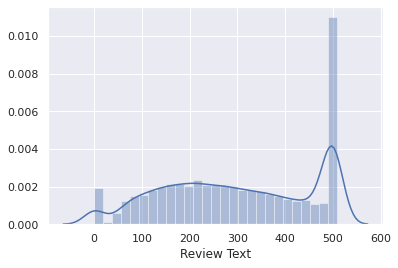

In [7]:
lenght = data["Review Text"].str.len()
sns.distplot(lenght)
plt.show()

In [8]:
lenght.describe()

count    23486.000000
mean       297.444903
std        152.461221
min          0.000000
25%        173.000000
50%        292.000000
75%        450.000000
max        508.000000
Name: Review Text, dtype: float64

In [9]:
data[lenght==500]["Review Text"].iloc[0]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

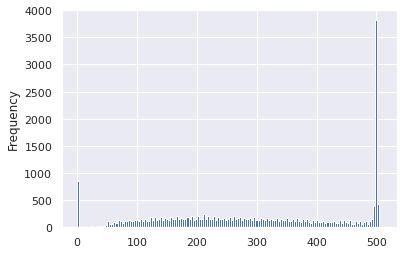

In [10]:
lenght.plot.hist(bins=150)

In [11]:
# NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()

In [12]:
## Checking for stopwords
from nltk.corpus import stopwords
stopwordSet = set(stopwords.words("english"))

In [13]:
## Clean the text 
import string
text_reviews = list()
i = 0
for sentence in data["Review Text"]:
    text = re.sub('[^a-zA-Z]'," ", sentence)
    #print(sentence)
    #print(text, '\n')
    text = text.lower()
    text = word_tokenize(text, language="english")
    #print(text, '\n')
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    #print(text, '\n')
    text = " ".join(text)
    #print(text, '\n')
    #text_reviews.append(string(text))
    text_reviews.append(text)
    #print(i, '--->', text, '\n')
    i = i+1

In [14]:
## Create the (B.O.W) bag of word model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(text_reviews).toarray()

In [15]:
pd.DataFrame(X, columns=cv.get_feature_names()).head(10)

,able,absolutely,accent,accentuates,accessory,accommodate,accurate,across,actual,actually,add,added,adding,addition,additional,adjust,adjustable,adorable,adore,advice,afraid,ag,age,ago,agree,ahead,air,airy,ala,allow,allows,almost,alone,along,already,also,alteration,altered,alternative,although,...,wonder,wonderful,wonderfully,wool,word,wore,work,worked,working,worn,worried,worry,worse,worth,would,woven,wow,wrap,wrinkle,wrinkled,wrist,write,wrong,xl,xsmall,xsp,xx,xxsp,yarn,year,yellow,yes,yesterday,yet,yoga,young,younger,zip,zipped,zipper
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
y= data['Recommended IND']

## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.2, random_state = 0)

#**Logistic Regression**

In [17]:
## Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.7521255184353209
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       671
           1       0.91      0.95      0.93      3087

    accuracy                           0.88      3758
   macro avg       0.80      0.75      0.77      3758
weighted avg       0.87      0.88      0.87      3758

[[ 374  297]
 [ 164 2923]]


# **Random Forest**

In [19]:
## Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_valid)

In [20]:
fpr, tpr, thresholds  = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.6499393881461462
              precision    recall  f1-score   support

           0       0.82      0.31      0.46       671
           1       0.87      0.99      0.92      3087

    accuracy                           0.87      3758
   macro avg       0.85      0.65      0.69      3758
weighted avg       0.86      0.87      0.84      3758

[[ 211  460]
 [  45 3042]]


# **Naive Bayes**

In [21]:
## Naives baye multinomial
clf = MultinomialNB()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_valid)

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.8223020242090165
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       671
           1       0.94      0.91      0.93      3087

    accuracy                           0.88      3758
   macro avg       0.79      0.82      0.81      3758
weighted avg       0.89      0.88      0.88      3758

[[ 491  180]
 [ 269 2818]]


The homework is to use the Review Text (and any other feature's you'd like) to predict whether someone will recommend (Recommended IND) a product or not.

# Have fun!

You are also welcome to use AutoML if you'd prefer (or both! :)

# **Thank you, Charlie!**